<a href="https://colab.research.google.com/github/lakshayvirmani/umich-eecs-deep-learning/blob/main/NearestNeighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NearestNeighbour

In [67]:
import numpy as np

class NearestNeighbour(object):

  def __init__(self):
    pass
  
  def train(self, X, y):
    self.Xtr = X
    self.ytr = y

  def predict(self, X, dist='L1', k=1):
    num_test = X.shape[0]
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    for i in range(num_test):
      if (i + 1) % 10 == 0:
        print('Predicting for sample no: {}'.format(i+1))

      if dist == 'L1':
        distances = np.sum(np.abs(self.Xtr - X[i, :]), axis = 1)
      elif dist == 'L2':
        distances = np.sqrt(np.sum(np.square(self.Xtr - X[i, :]), axis = 1))
      else:
        raise Exception('Unknown distance metric: {}'.format(dist))

      indices = np.argpartition(distances, k)
      closest_indices = indices[:k]

      closest_predictions = self.ytr[closest_indices]
      closest_predictions_1d = closest_predictions.reshape((closest_predictions.shape[0],))

      Ypred[i] = np.bincount(closest_predictions_1d).argmax()

    return Ypred

In [68]:
import tensorflow as tf
(Xtr, ytr), (Xte, yte) = tf.keras.datasets.cifar10.load_data()

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(50000, 3072)
(10000, 3072)


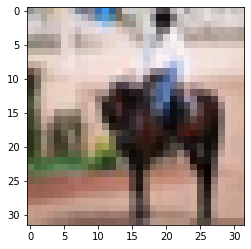

In [69]:
print(Xtr.shape)
print(ytr.shape)

print(Xte.shape)
print(yte.shape)

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(Xtr[11])

Xtr_rows = Xtr.reshape(Xtr.shape[0], Xtr.shape[1] * Xtr.shape[2] * Xtr.shape[3])
Xte_rows = Xte.reshape(Xte.shape[0], Xte.shape[1] * Xte.shape[2] * Xte.shape[3])

print(Xtr_rows.shape)
print(Xte_rows.shape)

In [70]:
classifier = NearestNeighbour()
classifier.train(Xtr_rows[:100], ytr[:100])

yte_predict = classifier.predict(Xte_rows[:100])
print('Accuracy: {}%'.format(np.mean(yte_predict == yte[:100])*100))

Predicting for sample no: 10
Predicting for sample no: 20
Predicting for sample no: 30
Predicting for sample no: 40
Predicting for sample no: 50
Predicting for sample no: 60
Predicting for sample no: 70
Predicting for sample no: 80
Predicting for sample no: 90
Predicting for sample no: 100
Accuracy: 9.25%


In [71]:
classifier.train(Xtr_rows, ytr)

In [72]:
random_selector = np.random.randint(low=0, high=Xte.shape[0]-1, size=100)
print(random_selector)

[4539 1649 1342 6554 7040 6016 1467 8136 9234 7824 8214 4369 1426  759
 5498 4764 9001 8514 9432  569 3028  724 9469 1971 6644 6946  420 2719
 7516 6168 6829 1843  360 9235 9314 7063  643 9552 4305 7284 6371 1493
 5657 3757  886 2150 2910 7331 2892 8165 2569 1628 9637 6916 9723 1143
  212 8531  985 6068 5359 7423 9878 3212 3635 2859 9346  894 3902 6600
 1434 4980 3145  759 9668 6748 9663 3383 3747 5061 3255 9115 4436 6773
 6790 5446 1168 9868 3780  645 7553 2833 1099 3053 1972 6681 1569 2152
 9180  857]


In [73]:
yte_predict = classifier.predict(Xte_rows[random_selector])
print('Accuracy: {:.2f}%'.format(np.mean(yte_predict == yte[random_selector])*100))

Predicting for sample no: 10
Predicting for sample no: 20
Predicting for sample no: 30
Predicting for sample no: 40
Predicting for sample no: 50
Predicting for sample no: 60
Predicting for sample no: 70
Predicting for sample no: 80
Predicting for sample no: 90
Predicting for sample no: 100
Accuracy: 9.72%


In [74]:
yte_predict = classifier.predict(Xte_rows[random_selector], dist='L2')
print('Accuracy: {:.2f}%'.format(np.mean(yte_predict == yte[random_selector])*100))

Predicting for sample no: 10
Predicting for sample no: 20
Predicting for sample no: 30
Predicting for sample no: 40
Predicting for sample no: 50
Predicting for sample no: 60
Predicting for sample no: 70
Predicting for sample no: 80
Predicting for sample no: 90
Predicting for sample no: 100
Accuracy: 9.80%


In [75]:
yte_predict = classifier.predict(Xte_rows[random_selector], dist='L2', k=3)
print('Accuracy: {:.2f}%'.format(np.mean(yte_predict == yte[random_selector])*100))

Predicting for sample no: 10
Predicting for sample no: 20
Predicting for sample no: 30
Predicting for sample no: 40
Predicting for sample no: 50
Predicting for sample no: 60
Predicting for sample no: 70
Predicting for sample no: 80
Predicting for sample no: 90
Predicting for sample no: 100
Accuracy: 10.78%


In [76]:
yte_predict = classifier.predict(Xte_rows[random_selector], dist='L2', k=5)
print('Accuracy: {:.2f}%'.format(np.mean(yte_predict == yte[random_selector])*100))

Predicting for sample no: 10
Predicting for sample no: 20
Predicting for sample no: 30
Predicting for sample no: 40
Predicting for sample no: 50
Predicting for sample no: 60
Predicting for sample no: 70
Predicting for sample no: 80
Predicting for sample no: 90
Predicting for sample no: 100
Accuracy: 10.03%


In [77]:
yte_predict = classifier.predict(Xte_rows[random_selector], dist='L2', k=10)
print('Accuracy: {:.2f}%'.format(np.mean(yte_predict == yte[random_selector])*100))

Predicting for sample no: 10
Predicting for sample no: 20
Predicting for sample no: 30
Predicting for sample no: 40
Predicting for sample no: 50
Predicting for sample no: 60
Predicting for sample no: 70
Predicting for sample no: 80
Predicting for sample no: 90
Predicting for sample no: 100
Accuracy: 10.15%
